# Homework 4 - UFOs!!!

The objective of this homework is to practice cleaning and transforming data. To successfully complete this homework, you may use any resources available to you.
Get the scrubbed.csv data here. Develop three interesting insights into the UFO phenomenon.

* When and where do people see UFOs in California?
* Are there differences in the circumstances of UFO sightings across the U.S. states? (Explore the comment column)
* What is the average length of UFO sightings across the U.S. states?

Hints:
When you explore the comment column, think about the work we did on twitter.
For better performance, download the data to your local drive.
Make reasonable assumptions when transforming the length data.

To make multi-line outputs work!

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

Import the pandas framework to work with Dataframes

In [2]:
import pandas as pd

### Data for the Assignment

Read the CSV file which contains the UFO data.

Note - CSV file couldn't be uploaded to github and hence was used as part of the Jupyter Notebook.

In [3]:
ufo_df = pd.read_csv("scrubbed.csv",low_memory = False) 

#### Copy the DataFrame to a New one to work and edit! 

In [6]:
ufo_df_copy = ufo_df

Change the column name for better understanding.

In [7]:
ufo_df_copy.rename(columns = {'duration (seconds)':'duration in seconds'}, inplace=True)

#### To find only the occurences in US as their country.

In [8]:
stateCa = ufo_df_copy['country'] == 'us'

In [9]:
ufo_ca = ufo_df_copy[stateCa]

#### To ignore the warnings if any.

In [11]:
import warnings
warnings.filterwarnings('ignore')

The duration in seconds column is in String, Strip the string to delete whitespaces and also use regular expressions to allow only accepted values

In [12]:
ufo_ca['duration in seconds'] = ufo_ca['duration in seconds'].str.strip()

In [13]:
ufo_ca_mean = ufo_ca['duration in seconds'].str.extract('([0-9]+)')

The format of the durations in in string and it needs to be converted to numeric values, float has been used as the conversion type because of some values having decimal points



http://www.secnetix.de/olli/Python/lambda_functions.hawk

In [15]:
ufo_ca_mean = ufo_ca_mean.apply(lambda x: float(x))

The mean time is to be represented in minutes and hence it is divided by 60 to be converted into minutes

In [16]:
ufo_ca_mean = ufo_ca_mean/60

In [172]:
%matplotlib inline

The mean function is used to get the mean of the UFO sightings in minutes.

In [19]:
ufo_ca_mean.mean()

96.66687706688512

The average sighting of UFOs in the US is about 97 minutes!

In [24]:
newdf2 = ufo_df.loc[ufo_df['comments'].str.contains('light',na=False)]

newdf2['datetime'].count()
newdf2['datetime'].count()/ufo_df['datetime'].count() * 100

31318

38.985709306378531

### Interesting Fact - 1

Out of all the occurences, only about 40% of the sightings have mentioned about some form of light appearing while the UFO was in action.

This is interesting because, it is opposes the common belief that there is light during the UFO sightings.

In [66]:
newdf3 = ufo_df.loc[ufo_df['comments'].str.contains('fireball',na=False)]
newdf3['datetime'].count()
newdf3['datetime'].count()/ufo_df['datetime'].count() * 100

2142

2.6664342976646918

### Interesting Fact - 2 :

It is interesting to note that some of the UFO sightings have been mentioned as 'Fireball' appearing in the sky. Maybe these were not UFOs and they might have been Asteroid collision on the Earth's surface which appear to be fireballs when they enter the Earth's atmosphere. 

In [67]:
newdf4 = ufo_df.loc[ufo_df['comments'].str.contains('summer',na=False)]
newdf4['datetime'].count()
newdf4['datetime'].count()/ufo_df['datetime'].count() * 100

199

0.2477219538913509

In [68]:
newdf4 = ufo_df.loc[ufo_df['comments'].str.contains('fall',na=False)]
newdf4['datetime'].count()
newdf4['datetime'].count()/ufo_df['datetime'].count() * 100

751

0.93487028830354035

In [69]:
newdf4 = ufo_df.loc[ufo_df['comments'].str.contains('winter',na=False)]
newdf4['datetime'].count()
newdf4['datetime'].count()/ufo_df['datetime'].count() * 100

34

0.042324353931185582

In [70]:
newdf4 = ufo_df.loc[ufo_df['comments'].str.contains('spring',na=False)]
newdf4['datetime'].count()
newdf4['datetime'].count()/ufo_df['datetime'].count() * 100

59

0.073445202409998508

### Interesting Fact - 3 :

The sightings of UFOs have also been linked with stars, maybe people think about stars when they see the bright shining light in the Sky. 

In [76]:
newdf4 = ufo_df.loc[ufo_df['comments'].str.contains('star' or 'stars',na=False)]
newdf4['datetime'].count()
newdf4['datetime'].count()/ufo_df['datetime'].count() * 100

4232

5.2681372304934522

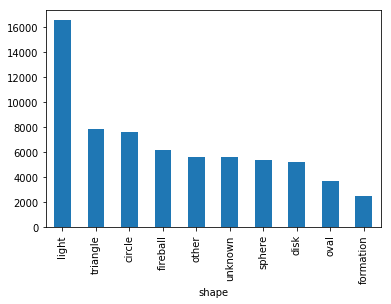

In [85]:
newDF = ufo_df.groupby('shape').count()
newDF = newDF.sort_values(by = 'datetime',ascending=False)
newDF2 = newDF.head(10)
newDF2['datetime'].plot.bar()


https://stackoverflow.com/questions/28311655/ignoring-nans-with-str-contains
    

The places and number of occurences of UFO sightings in California is to be found.

In [27]:
stateCa2 = ufo_df_copy['state'] == 'ca'
ufo_states2 = ufo_df_copy[stateCa2]

### Visualizing 'where' in california :
A new dataframe is created and is grouped by cities and counted to get the number of occurences in a particular place in california. This is then sorted using the sort function and the top 10 places with the most occurences is displayed. Matplotlib is used to visualize the data to get better understanding of the top 10 places with UFO sightings in the state.

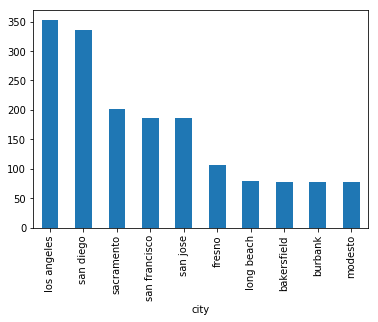

In [43]:
newdf5 = ufo_states2.groupby('city').count()
sortedStateDF = newdf5.sort_values(by = 'datetime',ascending = False)
sortedStateDF2 = sortedStateDF.head(10)
sortedStateDF2['datetime'].plot.bar()

### Golden State or UFO State?

California in the US has the most number of UFO sightings recorded at nearly about 10,000 sightings. Another interesting fact here to be noted is that Washington which has the 2nd highest UFO sightings is less than half of UFO sightings in California!

Moreover, it would be interesting to see if Agriculture has something to do with the UFO sightings as UFOs have a connection to corn fields and California is the Top state in the US for Agriculture produce.

https://www.ers.usda.gov/faqs/#Q1

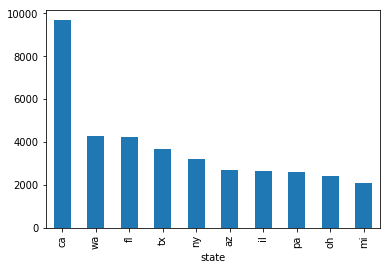

In [61]:
ufo_states = ufo_df.groupby('state').count()
ufo_states_sightings = ufo_states.sort_values(by = 'datetime',ascending=False)
ufo_states_sightings2 = ufo_states.head(10)
ufo_states_sightings2['datetime'].plot.bar()

In [62]:
ufo_ca_time = ufo_df.groupby('state')

### Visualizing 'when' in California :

The UFO sightings in California had began way back in the 1940s. But the recent sightings has increased tremendously, it can be seen from the graph that the top 10 number of occurences are in the recent years.

In [149]:
ufo_states3 = ufo_df_copy[stateCa2]

The date time is in String, so the string is split based on '/' and then the years are part of an array. 
Map functions have been used for transforming the data easily and a new dataframe is used to store the data.

In [150]:
ufo_states3['datetime'] = ufo_states3['datetime'].str.split('/')
years = ufo_states3['datetime'].map(lambda x: x[2]).str.split(' ')
years = years.map(lambda x: x[0])

In [159]:
df_final = pd.DataFrame(data = {"Years":years,"City":ufo_states3['city']})

In [ ]:
df_final.groupby('Years').count()

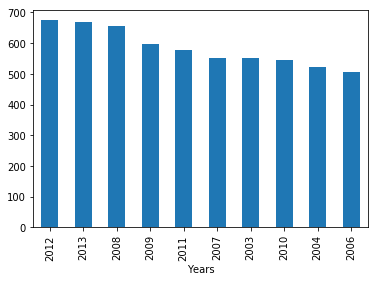

In [168]:
ufo_states4 = df_final.groupby('Years').count()
ufo_states_sightings3 = ufo_states4.sort_values(by = 'City',ascending=False)
ufo_states_sightings4 = ufo_states_sightings3.head(10)
ufo_states_sightings4['City'].plot.bar()